In [125]:
import pandas as pd
#pd.set_option('future.no_silent_downcasting', True)

In [126]:
# Carregar a planilha de obsidades
df_obesidade = pd.read_csv('/content/Obesity.csv')
df_obesidade.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [127]:
# Verificar o tamanho da base
df_obesidade.shape

(2111, 17)

In [128]:
# Verificar se tem dados nulos
df_obesidade.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [129]:
# Verificar a quantidade de valores por coluna
df_obesidade.nunique()

,0
Gender,2
Age,1402
Height,1574
Weight,1525
family_history,2
FAVC,2
FCVC,810
NCP,635
CAEC,4
SMOKE,2


In [130]:
# Analisando as colunas com valores binários
df_obesidade['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [131]:
df_obesidade['family_history'].unique()

array(['yes', 'no'], dtype=object)

In [132]:
df_obesidade['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [133]:
df_obesidade['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [134]:
df_obesidade['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [135]:
df_obesidade['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [136]:
df_obesidade['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [137]:
# Analisar o data type das coluna
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [138]:
# Ajustar as colunas de valores binários de Yes para 1 e No para 0 e forçar o data type para int64
cols = ['family_history', 'FAVC', 'SMOKE', 'SCC']
df_obesidade[cols] = df_obesidade[cols].replace({'yes': 1, 'no': 0}).astype('int64')



/tmp/ipython-input-2122010860.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_obesidade[cols] = df_obesidade[cols].replace({'yes': 1, 'no': 0}).astype('int64')


In [139]:
# Converter a coluna gender de ['Female', 'Male'] para Male=1 e Female=1
df_obesidade['Gender'] = df_obesidade['Gender'].replace({'Female': 1, 'Male': 0}).astype('int64')


/tmp/ipython-input-2187101013.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_obesidade['Gender'] = df_obesidade['Gender'].replace({'Female': 1, 'Male': 0}).astype('int64')


In [140]:
# Criar um dicionário para as colunas CAEC e CALC, sendo:
# no=0, Sometimes=1, Frequently=2, Always=3
dict_frequencia = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}

df_obesidade['Ind_CAEC'] = df_obesidade['CAEC'].map(dict_frequencia)
df_obesidade['Ind_CALC'] = df_obesidade['CALC'].map(dict_frequencia)

df_obesidade.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,Ind_CAEC,Ind_CALC
0,1,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight,1,0
1,1,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1,1
2,0,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1,2
3,0,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I,1,2
4,0,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1,1


In [141]:
# Revendo os data types
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   int64  
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   int64  
 5   FAVC            2111 non-null   int64  
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   int64  
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   int64  
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
 17  Ind_CAEC        2111 non-null   i

In [142]:
# Rever o dataset
df_obesidade.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,Ind_CAEC,Ind_CALC
0,1,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight,1,0
1,1,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1,1
2,0,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1,2
3,0,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I,1,2
4,0,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1,1


In [143]:
# Ajustar a coluna de idade que está como float para int64 para corresponder com o dicionário de dados
# Age — (Idade) Idade em anos. Valores: numérico contínuo (mín 14, máx 61).
# Vamos arredondar a idade e transformar para inteiro
df_obesidade['Age'] = df_obesidade['Age'].round().astype('int64')



In [144]:
# Exibir a idade mínima e máxima
df_obesidade['Age'].min(), df_obesidade['Age'].max()

(14, 61)

In [145]:
df_obesidade['Height'] = (df_obesidade['Height'] * 100).astype('int64')
df_obesidade.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,Ind_CAEC,Ind_CALC
0,1,21,162,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight,1,0
1,1,21,152,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1,1
2,0,23,180,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1,2
3,0,27,180,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I,1,2
4,0,22,178,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1,1


In [146]:
# Verificar a correlação entre as variáveis
import matplotlib.pyplot as plt
import seaborn as sns


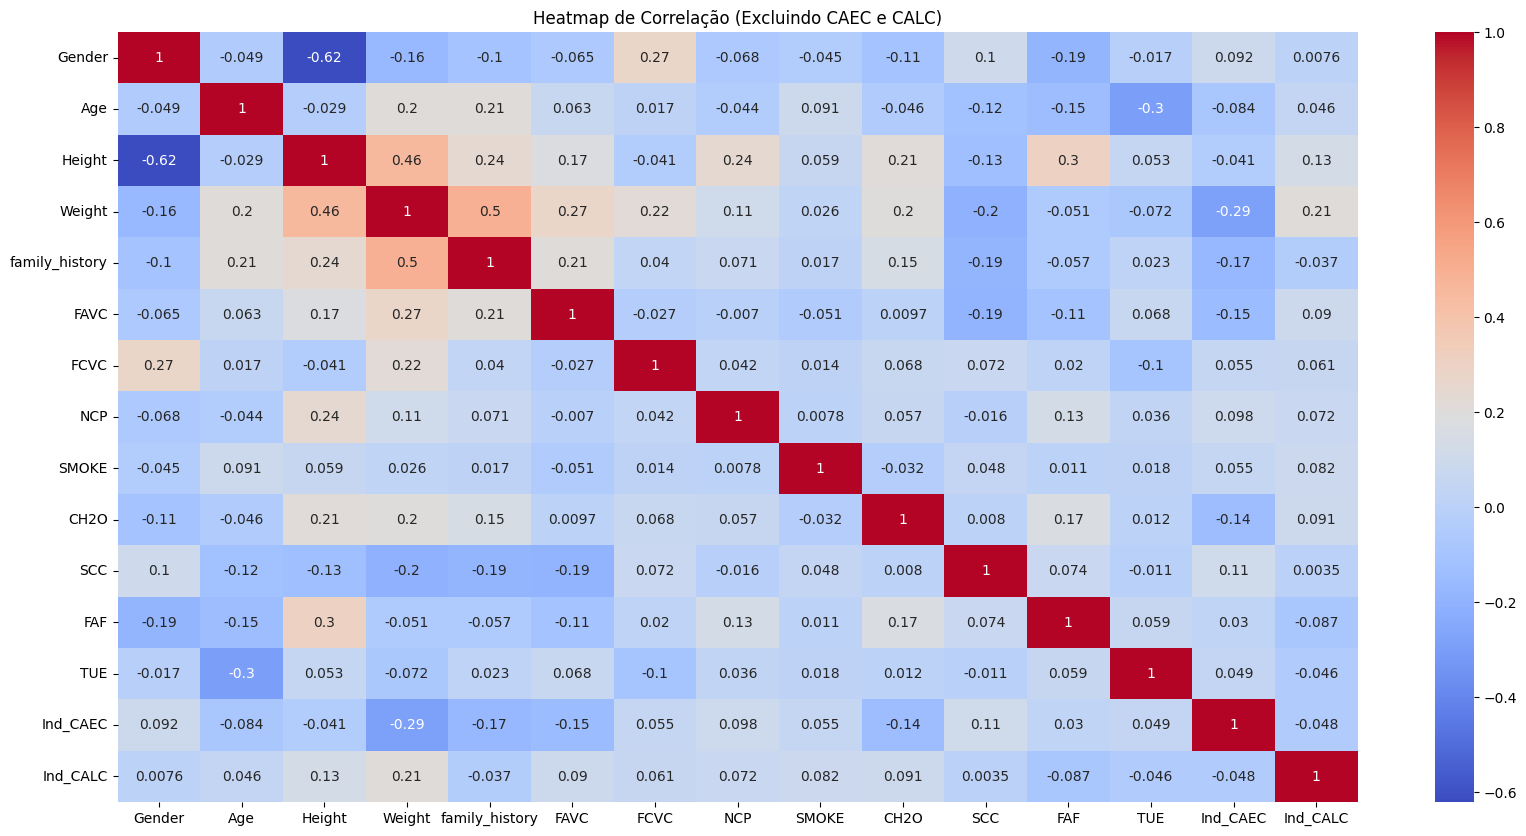

In [147]:
df_temp = df_obesidade.drop(columns=['CAEC', 'CALC']).copy()
corr_temp = df_temp.corr(numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(corr_temp, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação (Excluindo CAEC e CALC)')
plt.show()

In [148]:
# Separar nossos dados em treino e teste
from sklearn.model_selection import train_test_split
seed = 1561651

In [149]:
df_treino, df_teste = train_test_split(df_obesidade, test_size=0.2, random_state=seed)
df_treino.shape, df_teste.shape


((1688, 19), (423, 19))

In [150]:
# fazer uma copia dos data frames de treino e teste para manter a integridade
df_treino_copy = df_treino.copy()
df_teste_copy = df_teste.copy()

In [151]:
# Salvar o data frame de treino em CSV para possível uso futuro
df_treino.to_csv('df_treino.csv', index=False)
df_teste.to_csv('df_teste.csv', index=False)


In [152]:
df_treino.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,Ind_CAEC,Ind_CALC
526,1,20,152,42.000000,0,1,3.0,1.0,Frequently,0,1.322669,0,0.000000,0.478676,Sometimes,Public_Transportation,Insufficient_Weight,2,1
979,0,21,167,80.000000,1,1,2.0,3.0,Sometimes,0,2.000000,0,1.666390,1.443212,no,Public_Transportation,Overweight_Level_II,1,0
1946,1,24,163,113.905060,1,1,3.0,3.0,Sometimes,0,2.495961,0,0.189831,0.652289,Sometimes,Public_Transportation,Obesity_Type_III,1,1
2020,1,26,160,104.854928,1,1,3.0,3.0,Sometimes,0,2.613504,0,0.067985,0.778632,Sometimes,Public_Transportation,Obesity_Type_III,1,1
1935,1,21,167,121.639178,1,1,3.0,3.0,Sometimes,0,1.484938,0,0.742250,0.604692,Sometimes,Public_Transportation,Obesity_Type_III,1,1


Preparação do Pipeline

In [153]:
# Preparar os dataframes de teste e treino para o processo de machine learning
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE

#### Colunas recomendadas para o MinMaxScaler

As colunas `Age`, `Height`, `Weight`, `FCVC`, `NCP`, `CH2O`, `FAF`, `TUE`, `Ind_CAEC` e `Ind_CALC` são recomendadas para a aplicação do `MinMaxScaler`.

**Por que essas colunas?**

1.  **Natureza Numérica e Variação:** São colunas numéricas que apresentam uma gama variada de valores. A aplicação do `MinMaxScaler` as escalará para um intervalo específico (geralmente entre 0 e 1), o que é benéfico para muitos algoritmos de Machine Learning que são sensíveis à escala dos dados.
2.  **Preparação para Modelos:** Escalar essas features ajuda a evitar que features com valores maiores dominem o processo de treinamento do modelo em detrimento de features com valores menores, garantindo que todas as features contribuam igualmente.

**Por que outras colunas não foram recomendadas?**

*   **Colunas Binárias:** Colunas como `Gender`, `family_history`, `FAVC`, `SMOKE` e `SCC` já foram convertidas para valores binários (0 ou 1). Elas já estão em uma escala padronizada e não se beneficiariam de uma nova transformação pelo `MinMaxScaler`.
*   **Colunas Categóricas (Originais):** As colunas `CAEC`, `CALC` e `MTRANS` são categóricas. Embora `CAEC` e `CALC` tenham sido transformadas em `Ind_CAEC` e `Ind_CALC` (que são numéricas e escaláveis), a coluna `MTRANS` ainda precisaria de um tratamento específico para variáveis categóricas (como One-Hot Encoding ou Ordinal Encoding, dependendo do contexto) antes de qualquer tipo de escalonamento.

In [154]:
# Executar a pipeline
from sklearn.pipeline import Pipeline

In [155]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE


class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, feature_to_drop=['CAEC', 'CALC']):
        self.feature_to_drop = feature_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.feature_to_drop)


class MinMax(BaseEstimator, TransformerMixin):
    def __init__(self, cols=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']):
        self.cols = cols
        self.scaler = MinMaxScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X[self.cols])
        return self

    def transform(self, X):
        X = X.copy()
        X[self.cols] = self.scaler.transform(X[self.cols])
        return X


class OnHotEncodingNames(BaseEstimator, TransformerMixin):
    def __init__(self, OneHotEncoding=['MTRANS']):
        self.OneHotEncoding = OneHotEncoding
        self.encoder = OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore'
        )

    def fit(self, X, y=None):
        self.encoder.fit(X[self.OneHotEncoding])
        return self

    def transform(self, X):
        encoded = self.encoder.transform(X[self.OneHotEncoding])
        feature_names = self.encoder.get_feature_names_out(self.OneHotEncoding)

        df_encoded = pd.DataFrame(
            encoded,
            columns=feature_names,
            index=X.index
        )

        df_rest = X.drop(columns=self.OneHotEncoding)
        return pd.concat([df_rest, df_encoded], axis=1)


class Oversample(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        smote = SMOTE(sampling_strategy='minority')
        X_bal, y_bal = smote.fit_resample(
            X.drop(columns=['Obesity']),
            X['Obesity']
        )
        return pd.concat([X_bal, y_bal], axis=1)


In [156]:
pipeline_model = Pipeline([
    ('drop_cols', DropColumns()),
    ('min_max', MinMax()),
    ('one_hot_enc', OnHotEncodingNames()),
    ('oversample', Oversample())
])

pipeline_model.fit(df_treino)




Pipeline(steps=[('drop_cols', DropColumns()), ('min_max', MinMax()),
                ('one_hot_enc', OnHotEncodingNames()),
                ('oversample', Oversample())])

In [157]:
#Verificar se coluna target está balanceada
df_treino['Obesity'].value_counts()


,count
Obesity,
Obesity_Type_I,281
Obesity_Type_III,261
Obesity_Type_II,242
Overweight_Level_I,235
Normal_Weight,230
Overweight_Level_II,228
Insufficient_Weight,211


In [158]:
# APLICAR PIPELINE NO TREINO (gera dados numéricos + SMOTE)
treino = pipeline_model.fit_transform(df_treino)

x_treino = treino.drop(columns=['Obesity'])
y_treino = treino['Obesity']

# APLICAR PIPELINE NO TESTE (SEM SMOTE)
teste = pipeline_model[:-1].transform(df_teste)

x_teste = teste.drop(columns=['Obesity'])
y_teste = teste['Obesity']


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [159]:
from sklearn.linear_model import LogisticRegression

SEED = 1561651
modelo_logistico = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=2000,
    random_state=SEED
)


In [160]:
# IMPORTS E CONSTANTES
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    ConfusionMatrixDisplay
)

def roda_modelo(modelo):
    modelo.fit(x_treino, y_treino)

    print(f"\n----------- Resultados {modelo.__class__.__name__} -----------")

    # AUC Multiclasse
    if hasattr(modelo, "predict_proba"):
        prob_predic = modelo.predict_proba(x_teste)
        auc = roc_auc_score(
            y_teste,
            prob_predic,
            multi_class='ovr',
            average='weighted'
        )
        print(f"AUC (Weighted One-vs-Rest): {auc:.4f}")
    else:
        print("Modelo não suporta predict_proba")

    # Matriz de Confusão
    fig, ax = plt.subplots(figsize=(10, 10))
    ConfusionMatrixDisplay.from_estimator(
        modelo,
        x_teste,
        y_teste,
        normalize='true',
        cmap=plt.cm.Blues,
        ax=ax
    )
    ax.set_title("Matriz de Confusão Normalizada")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Classification Report
    predicao = modelo.predict(x_teste)
    print("\nClassification Report")
    print(classification_report(y_teste, predicao, zero_division=0))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



----------- Resultados LogisticRegression -----------
AUC (Weighted One-vs-Rest): 0.9448


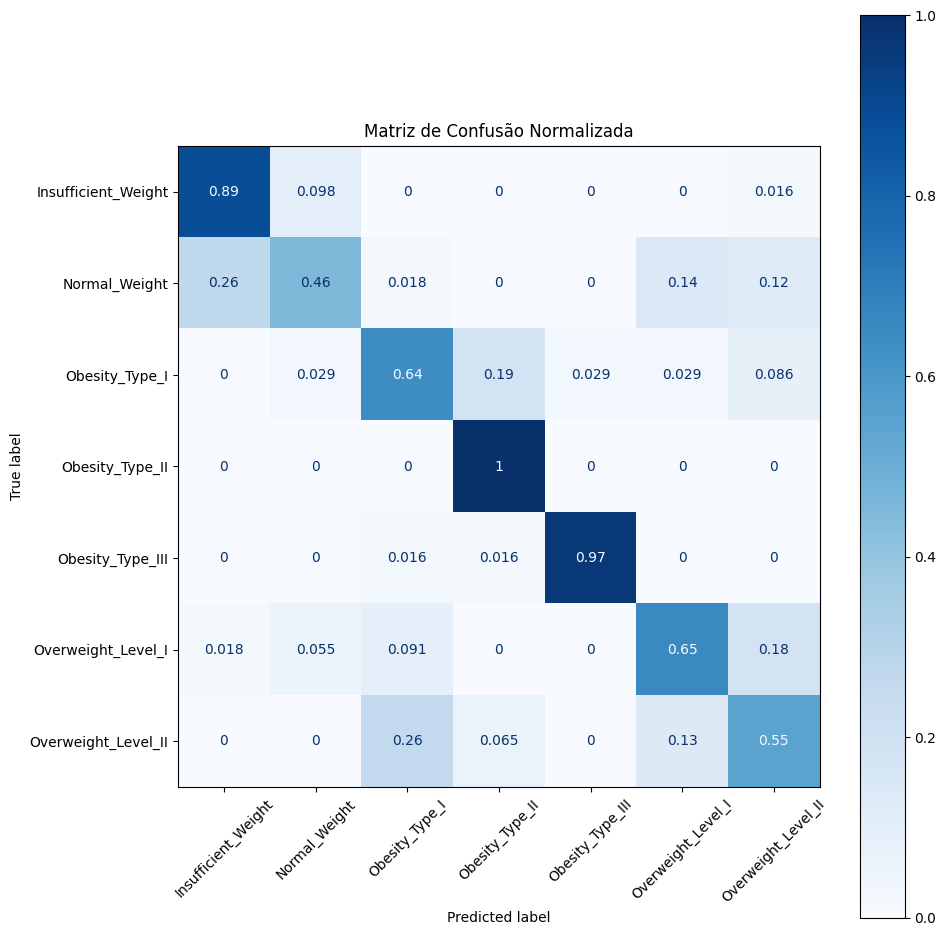


Classification Report
                     precision    recall  f1-score   support

Insufficient_Weight       0.77      0.89      0.82        61
      Normal_Weight       0.70      0.46      0.55        57
     Obesity_Type_I       0.66      0.64      0.65        70
    Obesity_Type_II       0.75      1.00      0.86        55
   Obesity_Type_III       0.97      0.97      0.97        63
 Overweight_Level_I       0.67      0.65      0.66        55
Overweight_Level_II       0.59      0.55      0.57        62

           accuracy                           0.74       423
          macro avg       0.73      0.74      0.73       423
       weighted avg       0.73      0.74      0.73       423



In [161]:
roda_modelo(modelo_logistico)

A matriz de confusão normalizada mostra que o modelo apresenta excelente desempenho para classes extremas de obesidade, como Obesity_Type_II e Obesity_Type_III, com taxas de acerto superiores a 97%.
As principais confusões ocorrem entre classes adjacentes, como Normal_Weight e Overweight_Level_I, o que é esperado dada a proximidade conceitual dessas categorias.
O valor elevado de AUC (0.9478) indica uma boa capacidade discriminativa geral do modelo.

In [162]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

def plot_roc_multiclasse(modelo, x_teste, y_teste):
    # Classes
    classes = modelo.classes_
    n_classes = len(classes)

    # Binarizar o y verdadeiro
    y_bin = label_binarize(y_teste, classes=classes)

    # Probabilidades previstas
    y_score = modelo.predict_proba(x_teste)

    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)

        plt.plot(
            fpr,
            tpr,
            lw=2,
            label=f'{classes[i]} (AUC = {roc_auc:.2f})'
        )

    # Linha aleatória
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - One-vs-Rest (Multiclasse)')
    plt.legend(loc='lower right', fontsize=9)
    plt.grid(True)
    plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


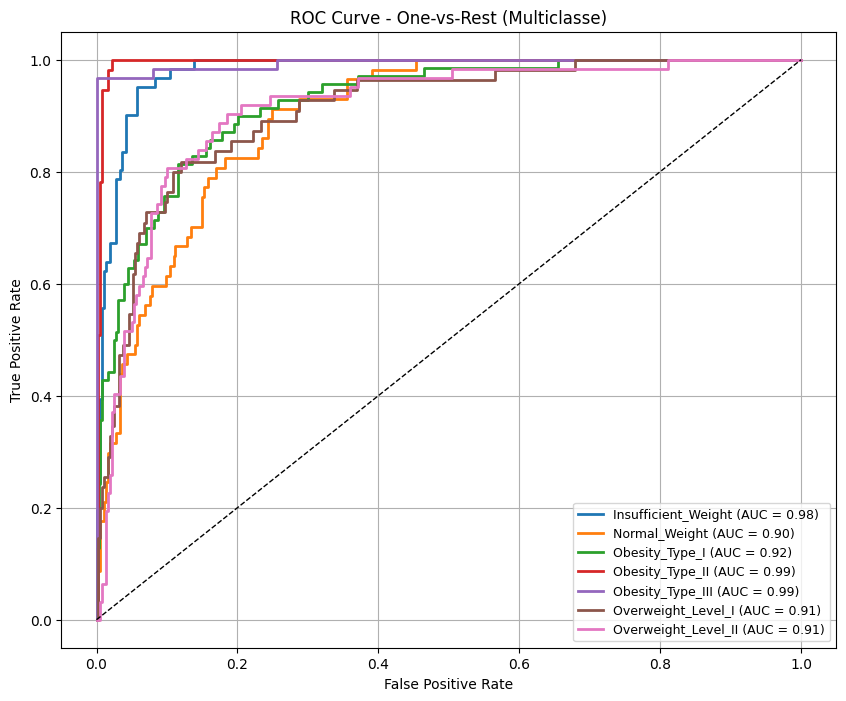

In [163]:
modelo_logistico.fit(x_treino, y_treino)
plot_roc_multiclasse(modelo_logistico, x_teste, y_teste)


In [164]:
import joblib

joblib.dump(pipeline_model, 'pipeline.pkl')
joblib.dump(modelo_logistico, 'model.pkl')


['model.pkl']